<a href="https://colab.research.google.com/github/tomohitom/Tennis_Game_Analysis/blob/main/point_winning_percentage_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv("/content/drive/MyDrive/match_stats/game_stats_2021.csv", encoding="cp932")

In [42]:
df.head()

,name,result,1stserve_percentage,1stserve_point,2ndserve_point,1stserve_rating,double_fault,double_fault/serve_game,serve_keep,total_winning_point,winning_percentage,ace,point/ace,game_streak,point_streak,url
0,T.ベルッシ,0,61,60,44,36.60,3,0.272727,63.636364,60,44.117647,3,20.000000,2,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...
1,T.モンテイロ,1,57,74,55,42.18,1,0.100000,90.000000,76,55.882353,2,38.000000,3,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...
2,T.ポール,1,64,68,62,43.52,0,0.000000,88.888889,64,58.181818,5,12.800000,6,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...
3,ナム ジソン,0,53,59,42,31.27,4,0.500000,50.000000,46,41.818182,2,23.000000,2,4,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...
4,G.マジェル,1,71,77,44,54.67,3,0.230769,92.307692,96,54.237288,9,10.666667,3,7,https://sportsnavi.ht.kyodo-d.jp/tennis/match/...


In [43]:
winner = df[df["result"] == 1]
loser = df[df["result"] == 0]
winner_percent = winner["winning_percentage"]
loser_percent = loser["winning_percentage"]

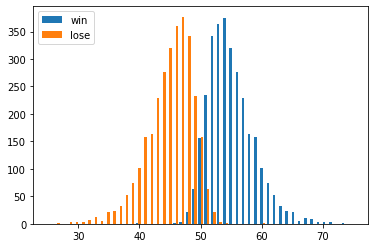

In [55]:
bins = np.linspace(25, 75, 50)
plt.hist([winner_percent, loser_percent], bins, label=["win", "lose"])
plt.legend(loc="upper left")
plt.savefig("win vs lose winning percent.jpeg")

In [45]:
winner_percent.index = loser_percent.index
win_percent = pd.concat([winner_percent, loser_percent], axis=1)
win_percent = win_percent.set_axis(["win", "lose"], axis=1)
win_percent["diff"] = win_percent["win"] - win_percent["lose"]
win_percent["total"] = win_percent["win"] + win_percent["lose"]
win_percent.head()

,win,lose,diff,total
0,55.882353,44.117647,11.764706,100.0
3,58.181818,41.818182,16.363636,100.0
5,54.237288,45.762712,8.474576,100.0
6,51.449275,48.550725,2.898551,100.0
8,55.084746,44.915254,10.169492,100.0


In [46]:
win_percent.describe()

,win,lose,diff,total
count,3047.000000,3047.000000,3047.000000,3.047000e+03
mean,55.061186,44.938814,10.122373,1.000000e+02
std,3.769852,3.769852,7.539704,3.827819e-15
min,39.726027,26.760563,-20.547945,1.000000e+02
25%,52.380952,42.857143,4.761905,1.000000e+02
50%,54.477612,45.522388,8.955224,1.000000e+02
75%,57.142857,47.619048,14.285714,1.000000e+02
max,73.239437,60.273973,46.478873,1.000000e+02


ポイント獲得率の差分

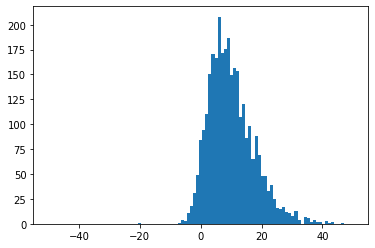

In [56]:
bins = np.linspace(-50, 50, 100)
plt.hist(win_percent["diff"], bins)
plt.savefig("winning_diff.jpeg")

In [65]:
print(len(win_percent[win_percent["diff"] <= -4]["diff"])/len(win_percent["diff"]))

0.005579258286839514


In [61]:
win_percent["diff"].describe()

count    3047.000000
mean       10.122373
std         7.539704
min       -20.547945
25%         4.761905
50%         8.955224
75%        14.285714
max        46.478873
Name: diff, dtype: float64

loserがポイント獲得率で上回るケース

In [60]:
point_winning_loser = loser[loser["winning_percentage"] > 50]
point_winning_loser.describe()

,result,1stserve_percentage,1stserve_point,2ndserve_point,1stserve_rating,double_fault,double_fault/serve_game,serve_keep,total_winning_point,winning_percentage,ace,point/ace,game_streak,point_streak
count,138.0,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.0,62.963768,72.021739,52.492754,45.205145,3.876812,0.218837,78.481669,114.608696,51.037397,9.731884,20.661525,3.963768,7.652174
std,0.0,6.950723,8.482242,8.119766,6.397309,3.511094,0.154823,10.772684,31.281728,1.093959,8.006876,25.586133,1.369157,2.319867
min,0.0,43.000000,52.000000,35.000000,30.740000,0.000000,0.000000,46.666667,44.000000,50.174216,0.000000,0.000000,1.000000,5.000000
25%,0.0,57.000000,65.250000,47.000000,40.870000,2.000000,0.117647,71.428571,93.000000,50.295858,4.000000,8.341667,3.000000,6.000000
50%,0.0,64.000000,72.000000,53.000000,44.800000,4.000000,0.187500,80.000000,108.000000,50.767389,7.500000,12.126984,3.000000,7.000000
75%,0.0,67.000000,78.750000,58.000000,49.470000,5.000000,0.290179,85.714286,126.000000,51.377442,13.000000,19.857143,5.000000,9.000000
max,0.0,89.000000,93.000000,71.000000,67.640000,26.000000,0.866667,100.000000,229.000000,60.273973,36.000000,134.000000,8.000000,18.000000
